<a href="https://colab.research.google.com/github/mohammadRahimi1993/Exercise/blob/main/LinkPrediction_ByNeighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[('A', 'D'), ('B', 'C'), ('C', 'B'), ('D', 'A')]
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


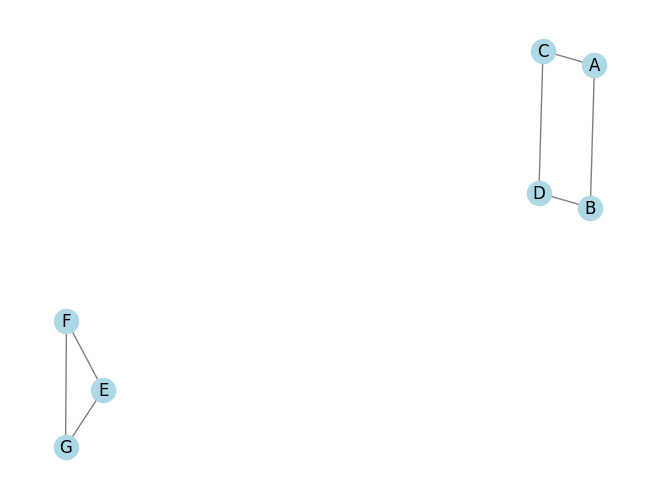

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# ساخت یک گراف نمونه
G = nx.Graph()
G.add_edges_from([
    ('E', 'G'),
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('E', 'F'),
    ('F', 'G'),
])

nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')

# تابع پیش‌بینی پیوند با استفاده از همسایگی مشترک
def predict_links_common_neighbors(G):
    predictions = []
    for u in G.nodes():
        for v in G.nodes():
            if u != v and not G.has_edge(u, v):
                common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                if common_neighbors > 0:
                    predictions.append((u, v))
    return predictions

# پیوندهای پیش‌بینی شده
predicted_links = predict_links_common_neighbors(G)
print(predicted_links)

# پیوندهای واقعی (برای ارزیابی)
real_links = [
    ('A', 'D'),
    ('B', 'C'),
    ('E', 'G'),
    ('F', 'H')
]

# ایجاد لیست‌های باینری برای ارزیابی
y_true = [1 if (u, v) in real_links or (v, u) in real_links else 0 for u, v in predicted_links]
y_pred = [1] * len(predicted_links)

# محاسبه معیارهای ارزیابی
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')